importing the necessary libraries, packages, reading the dataset and understanding the nature, shape, 
datatypes of columns in dataset and checking for null and duplicate values 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/soujanyabhat/Downloads/Employee Data 2.csv')

In [4]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [5]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [6]:
df.tail()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0
14248,159,NaN,NaN,0.578742,3,NaN,medium,0.808850,Employed,3.0


In [7]:
df.shape

(14249, 10)

In [8]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [10]:
df.duplicated().sum()

28

displaying a count plot of both numerical and categorical variables to understand the distribution of data for them respectively
and a pie chart for value counts of feature 'department'

interpretation : the highest avg_monthly hours observed in employees is around 150-200, 3 years is the average highest employees have worked
                the pie-chart lets us know that highest distribution of employees work in the sales department, only a handful of employees receive high salary, and there are more employed                  compared to those who left 

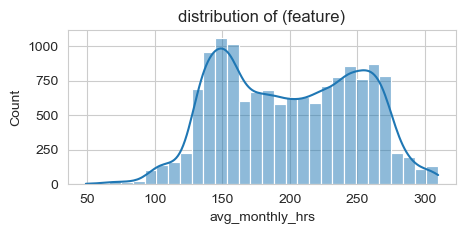

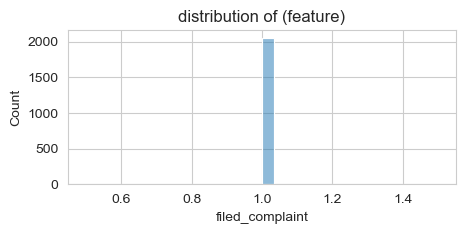

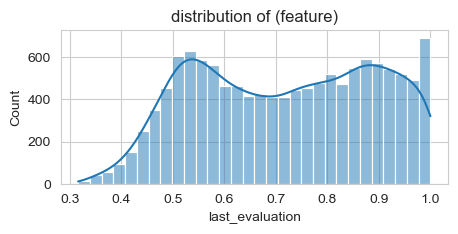

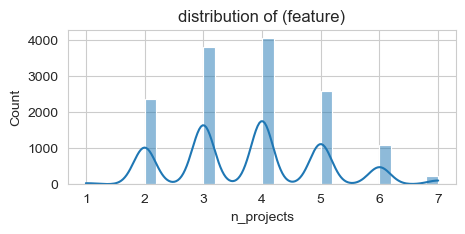

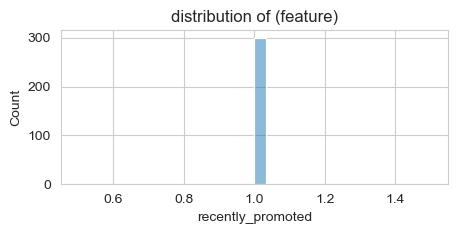

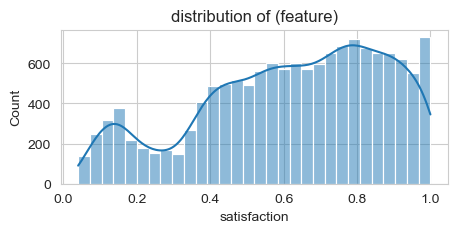

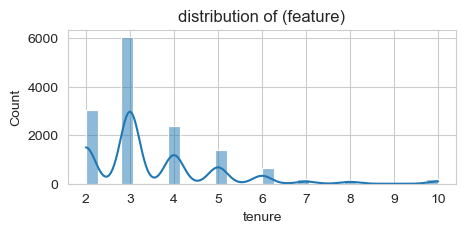

In [12]:
sns.set_style("whitegrid")
numerical_features = ['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects', 'recently_promoted', 'satisfaction', 'tenure']
for feature in numerical_features:
    plt.figure(figsize=(5,2))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'distribution of (feature)')
    plt.show()

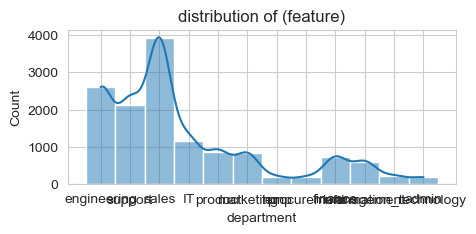

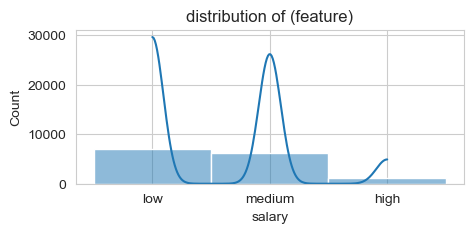

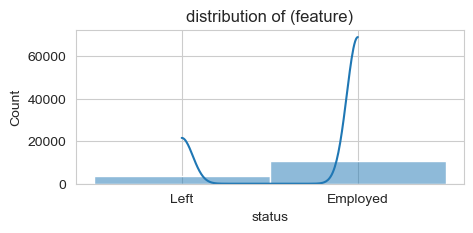

In [13]:
sns.set_style("whitegrid")
categorical_features = ['department', 'salary', 'status']
for feature in categorical_features:
    plt.figure(figsize=(5,2))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'distribution of (feature)')
    plt.show()

In [14]:
print(df['department'].value_counts())

department
sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: count, dtype: int64


<Axes: ylabel='count'>

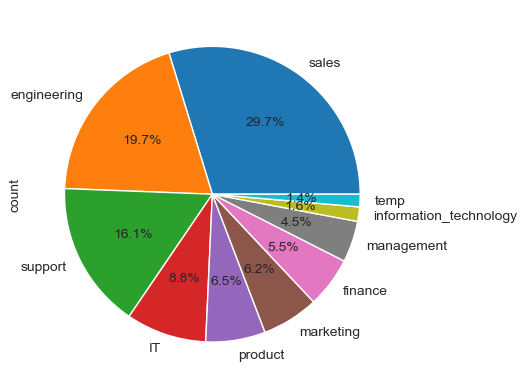

In [15]:
df.department.value_counts().apply(lambda item: item/df.shape[0])[:10].plot(kind='pie',autopct='%1.1f%%') 

displaying pie chart to understand percentage of employees still employed and those who left
around 76.2% employees are still working whereas 23% have left 

In [17]:
a = (df['status'].value_counts())
percent = a['Left']/len(df)*100

percentage of employees who left 23.80517931082883


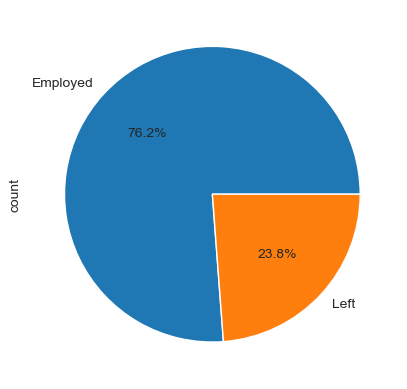

In [18]:
df.status.value_counts().apply(lambda item: item/df.shape[0])[:10].plot(kind='pie',autopct='%1.1f%%')
print("percentage of employees who left", percent)

displaying the value counts and the unique values in respective columns to find appropriate way to deal with null values 
note columns with null values : recently_promoted, filed_complaint, last_evaluation, satisfaction, tenure and department

In [20]:
print(df['recently_promoted'].value_counts())

recently_promoted
1.0    300
Name: count, dtype: int64


In [21]:
print(df['filed_complaint'].value_counts())

filed_complaint
1.0    2058
Name: count, dtype: int64


In [22]:
print(df['last_evaluation'].value_counts())

last_evaluation
1.000000    359
0.932868      1
0.460785      1
0.920127      1
0.701484      1
           ... 
0.345537      1
0.820797      1
0.867086      1
0.471595      1
0.578742      1
Name: count, Length: 12359, dtype: int64


In [23]:
print(df['satisfaction'].value_counts())

satisfaction
1.000000    359
0.829896      1
0.977110      1
0.617491      1
0.571061      1
           ... 
0.791234      1
0.834195      1
0.121133      1
0.556700      1
0.808850      1
Name: count, Length: 13710, dtype: int64


In [24]:
print(df['tenure'].value_counts())

tenure
3.0     6048
2.0     3046
4.0     2400
5.0     1373
6.0      664
10.0     200
7.0      182
8.0      155
Name: count, dtype: int64


In [25]:
df['filed_complaint'].unique()

array([nan,  1.])

In [26]:
df['last_evaluation'].unique()

array([0.93286764,        nan, 0.78882984, ..., 0.8476229 , 0.75718351,
       0.57874205])

In [27]:
df['recently_promoted'].unique()

array([nan,  1.])

In [28]:
df['satisfaction'].unique()

array([0.8298962 , 0.83454379, 0.83498761, ..., 0.89891745, 0.64130423,
       0.80885047])

In [29]:
df['tenure'].unique()

array([ 5.,  2.,  3.,  4.,  7.,  6., nan, 10.,  8.])

the null values in department are filled using the mode imputation (most frequent), last_evalution using mean imputation with mean of the values present,
recently_promoted with 0's, satisfaction using median imputation filled with the middle-most values, tenure with mode imputation and filed_complaint using 0's.

department and salary are then transformed to numerical values using label encoder which assigns numerical values to the variables accordingly

In [31]:
df['department'] = df['department'].fillna(value=df['department'].mode()[0])

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['last_evaluation'].fillna(df['last_evaluation'].mean(), inplace=True)
df['recently_promoted'].fillna(0, inplace=True)
df['satisfaction'].fillna(df['satisfaction'].median(), inplace=True)
df['tenure'].fillna(df['tenure'].mode()[0], inplace=True)
df['filed_complaint'].fillna(0, inplace=True)
df['department'] = label_encoder.fit_transform(df['department'])
df['salary'] = label_encoder.fit_transform(df['salary'])

In [33]:
df.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
dtype: int64

the duplicate values are recognised and then stored in variable called 'data' and then dropped

In [35]:
data = df.duplicated

In [36]:
data

<bound method DataFrame.duplicated of        avg_monthly_hrs  department  filed_complaint  last_evaluation  \
0                  221           2              0.0         0.932868   
1                  232          10              0.0         0.718477   
2                  184           9              0.0         0.788830   
3                  206           9              0.0         0.575688   
4                  249           9              0.0         0.845217   
...                ...         ...              ...              ...   
14244              178           0              0.0         0.735865   
14245              257           9              0.0         0.638604   
14246              232           3              1.0         0.847623   
14247              130           0              0.0         0.757184   
14248              159           9              0.0         0.578742   

       n_projects  recently_promoted  salary  satisfaction    status  tenure  
0               4 

In [37]:
df= df.drop_duplicates()

In [38]:
df.duplicated().sum()

0

tenure is stored in a variable 'x' and a histogram is plotted. 
a trend we notice shows us that majority of the employees i.e. around 6000 work for only 3 years 

boxplot for job satisfaction of employees show that those who have left had satisfaction levels around 0.1 to 0.7 while those who are employed have around 0.5 to 0.9

In [40]:
x = df['tenure']

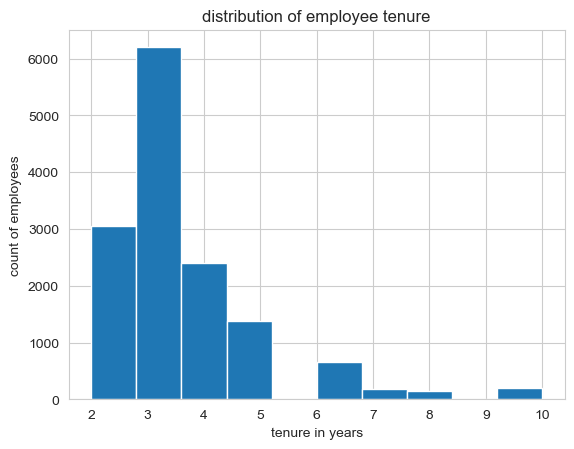

In [41]:
plt.hist(x)
plt.xlabel('tenure in years')
plt.ylabel('count of employees')
plt.title('distribution of employee tenure')
plt.show()

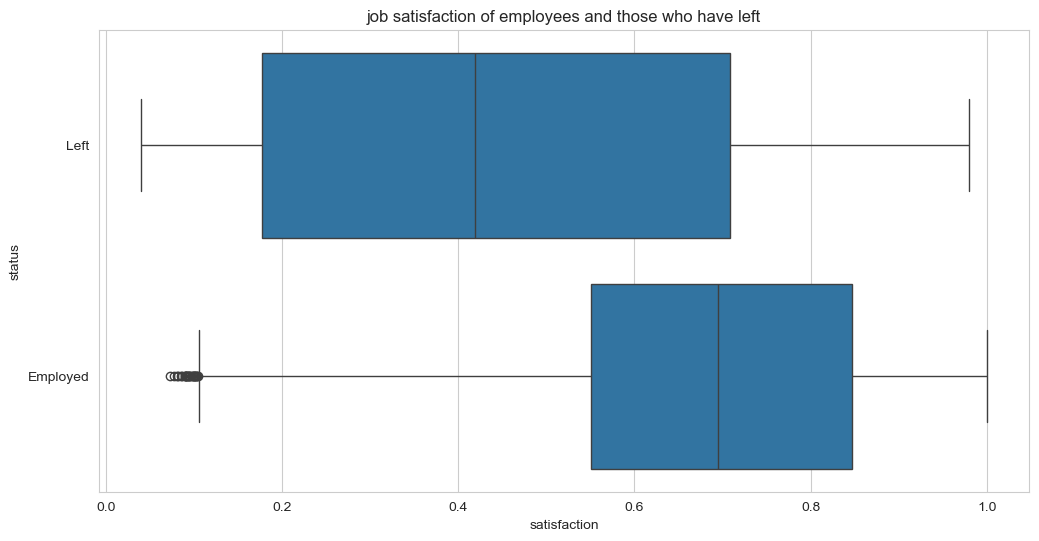

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='satisfaction', y='status', data=df)
plt.title('job satisfaction of employees and those who have left')
plt.show()

the feature status our target_variable is mapped. left : 0, employed : 1
the value counts of the target variables show us that the classes are imbalanced

the scatterplot against employees who left and their satisfaction and last_evaluations are checked to see if there exists any relationship

In [44]:
df['status'] = df['status'].map({'Left': 0, 'Employed': 1})
print(df[['status']].head())

   status
0       0
1       1
2       1
3       1
4       1


In [45]:
df['status'].value_counts()

status
1    10833
0     3388
Name: count, dtype: int64

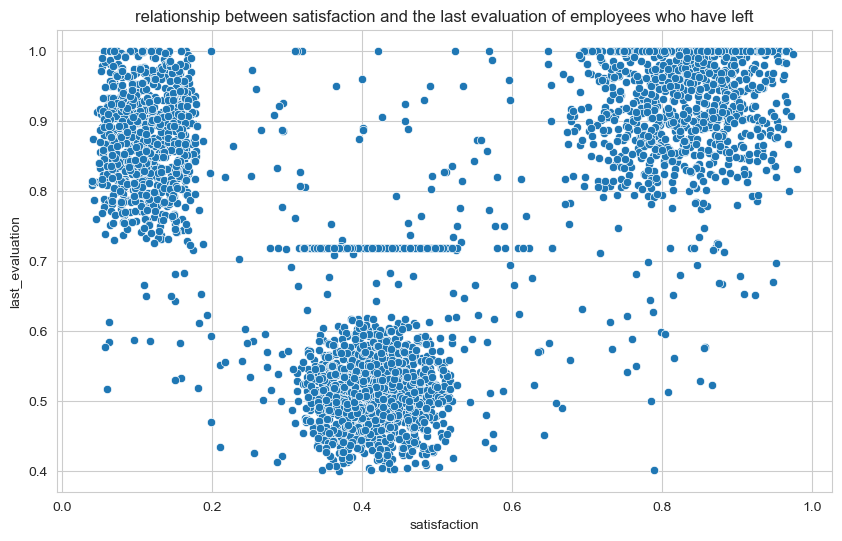

In [46]:
left=df[df['status']==0]
plt.figure(figsize=(10,6))
sns.scatterplot(x='satisfaction', y='last_evaluation', data=left)
plt.title('relationship between satisfaction and the last evaluation of employees who have left')
plt.xlabel('satisfaction')
plt.ylabel('last_evaluation')
plt.show()

In [47]:
correlation = left[['satisfaction', 'last_evaluation']].corr()
print(correlation)

                 satisfaction  last_evaluation
satisfaction         1.000000         0.177922
last_evaluation      0.177922         1.000000


the selected features for the decision tree include tenure, satisfaction, and no of projects
the target variable is status
the class imbalance is handled using SMOTE
the decision tree is pruned with max_depth being 5, and min_samples_leaf being 80 to give number of leaf nodes as 24

the training and testing accuracy are 92%.

In [49]:
feature_cols= ['tenure', 'satisfaction', 'n_projects']
X= df[feature_cols]
Y = df.status

In [50]:
Y.value_counts()

status
1    10833
0     3388
Name: count, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, Y_resampled = sm.fit_resample(X, Y)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=0)
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=80)
clf.fit(X_train,Y_train)
print("depth in tree",clf.get_depth())
print("number of leaves in tree",clf.get_n_leaves())

depth in tree 5
number of leaves in tree 24


In [54]:
trainacc=clf.predict(X_train)
testacc=clf.predict(X_test)
print("training accuracy", accuracy_score(Y_train,trainacc))
print("testing accuracy", accuracy_score(Y_test,testacc))

training accuracy 0.9268982229402262
testing accuracy 0.9289340101522843


with the decision tree having criterion entropy, and gini with max depth and min_samples_leaf the number of leaf nodes decrease and accuracy still remains 92%.
the classification report tells us that the precision for 0 is 95%, 1 is 91% and model recalls correctly 91% for 0 and 95% for 1 
the f1-score tells us that the model is not biased towards one class alone

In [56]:
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy",max_depth=4, min_samples_leaf=20)
clf_entropy.fit(X_train,Y_train)
print("depth in tree",clf_entropy.get_depth())
print("number of leaves in tree",clf_entropy.get_n_leaves())

depth in tree 4
number of leaves in tree 15


In [57]:
y_pred_entropy=clf_entropy.predict(X_test)
print("accuracy", accuracy_score(Y_test, y_pred_entropy))

accuracy 0.9296262113520997


In [58]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2165
           1       0.91      0.95      0.93      2169

    accuracy                           0.93      4334
   macro avg       0.93      0.93      0.93      4334
weighted avg       0.93      0.93      0.93      4334



In [59]:
clf_gini = tree.DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=20)
clf_gini.fit(X_train, Y_train)
print("depth in tree",clf_gini.get_depth())
print("number of leaves in tree",clf_gini.get_n_leaves())

depth in tree 4
number of leaves in tree 15


In [60]:
y_pred_gini=clf_gini.predict(X_test)
print("accuracy", accuracy_score(Y_test, y_pred_gini))

accuracy 0.9296262113520997


In [61]:
print(classification_report(Y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2165
           1       0.91      0.95      0.93      2169

    accuracy                           0.93      4334
   macro avg       0.93      0.93      0.93      4334
weighted avg       0.93      0.93      0.93      4334



the plot of the decision tree helps us understand that as the tree goes its depth the gini values decrease, entropy increases which shows us that we're approaching the purity node

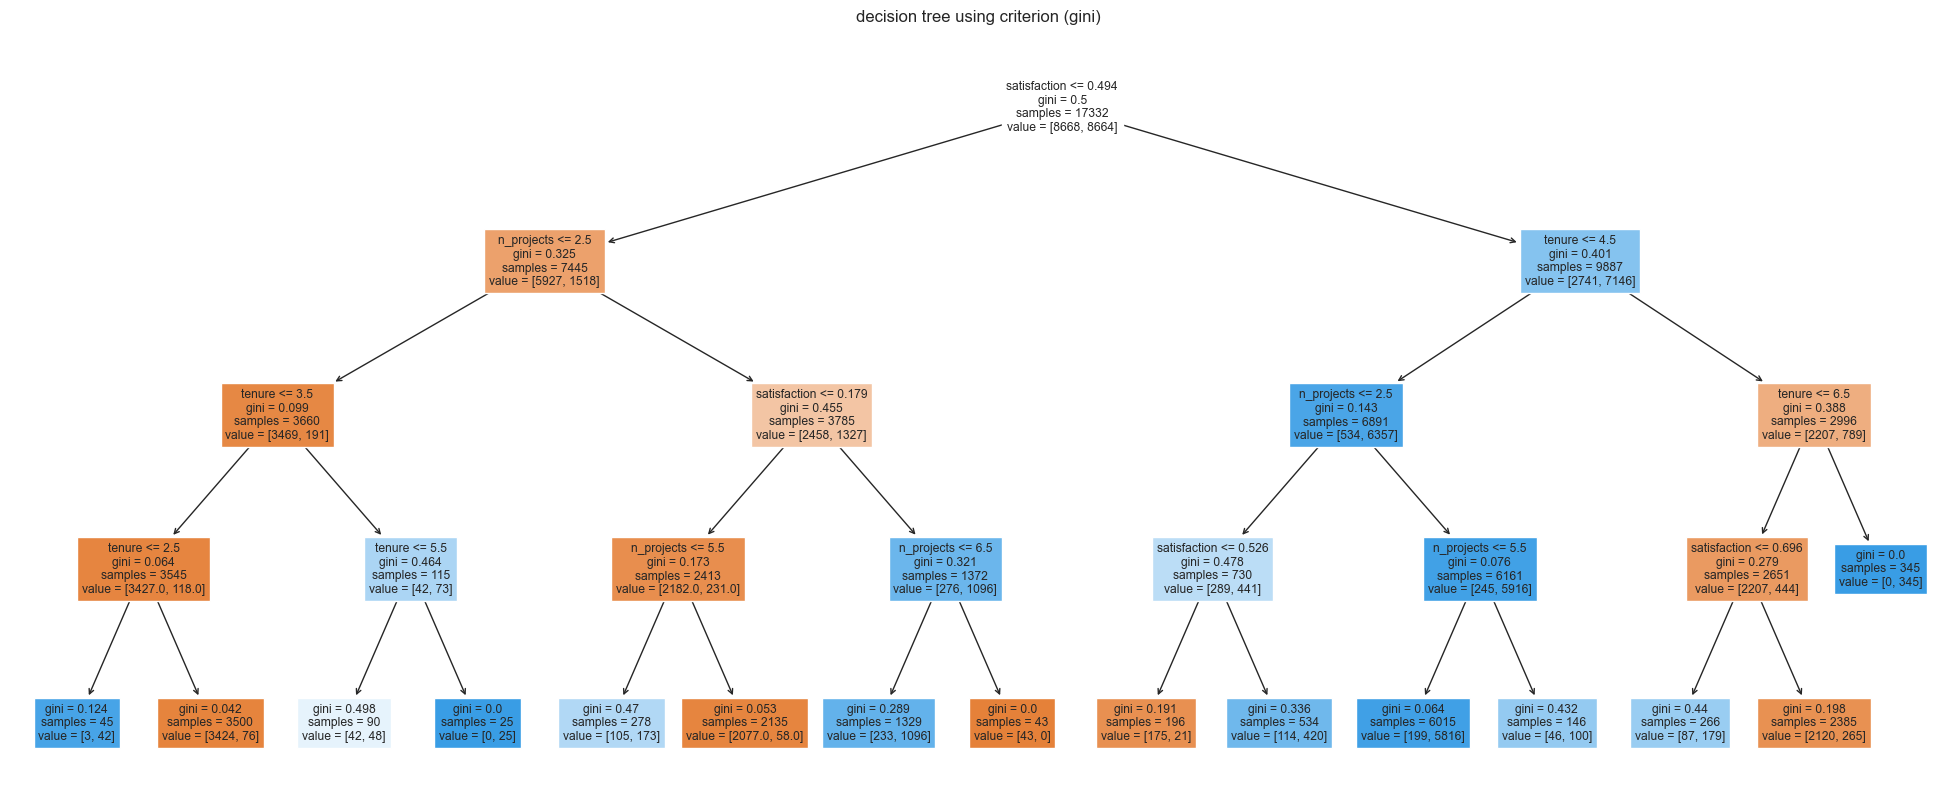

In [63]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf_gini, feature_names=['tenure', 'satisfaction', 'n_projects'], filled=True)
plt.title("decision tree using criterion (gini)")
plt.show()

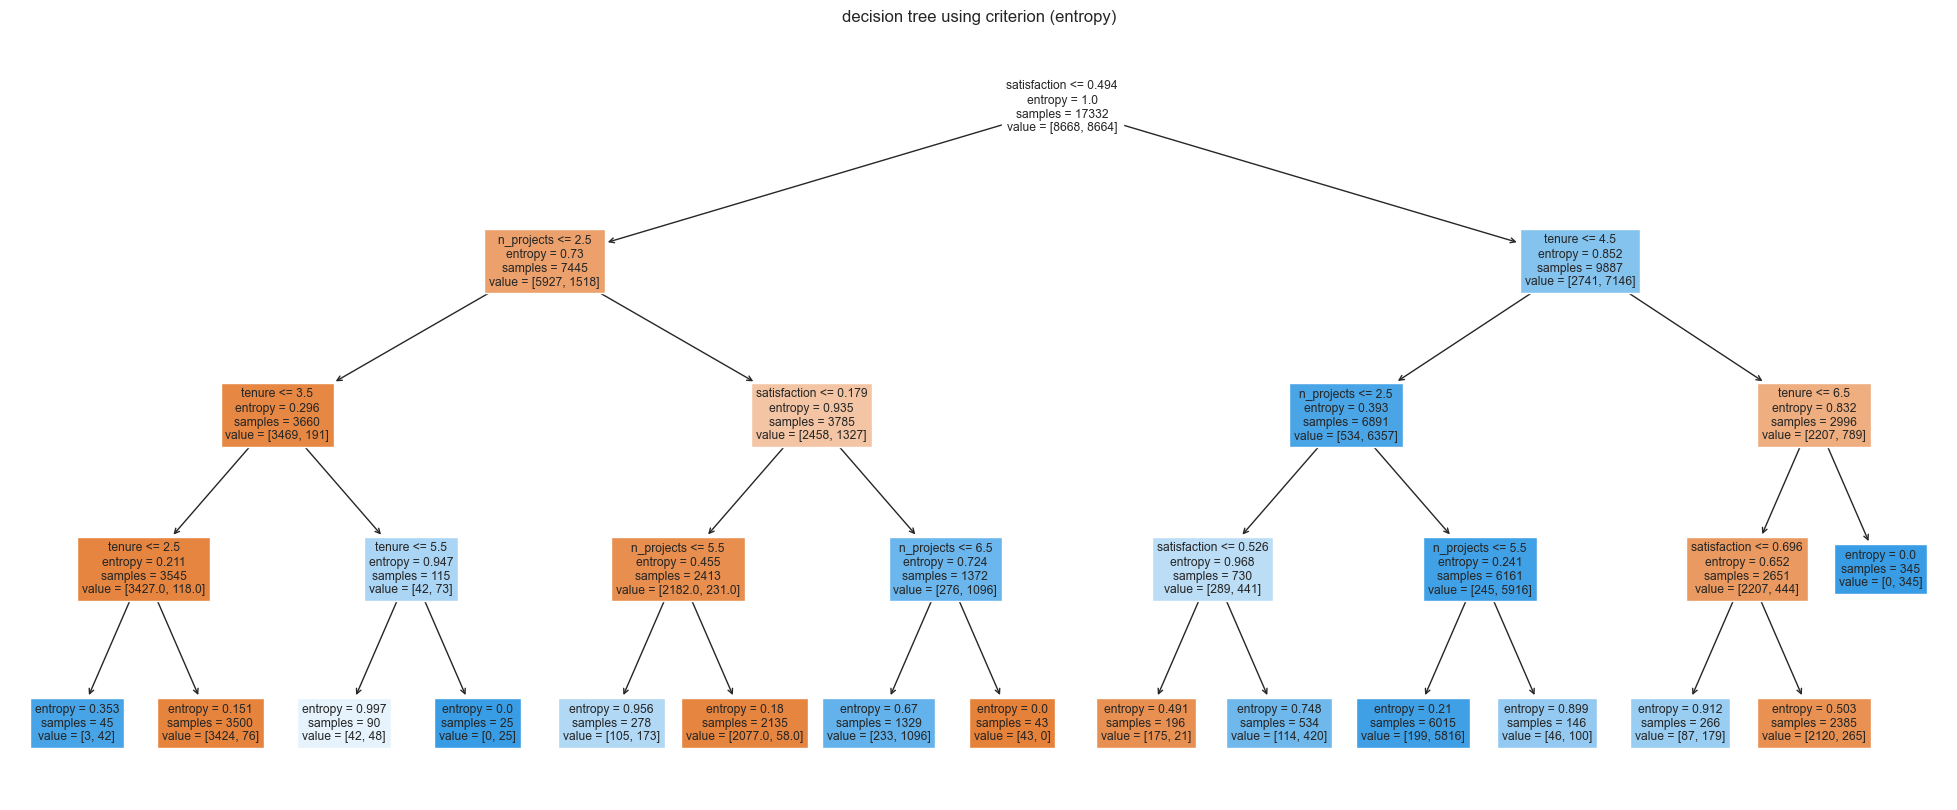

In [64]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf_entropy, feature_names=['tenure', 'satisfaction', 'n_projects'], filled=True)
plt.title("decision tree using criterion (entropy)")
plt.show()

a confusion matrix is constructed and visualised to understand the accuracy of the model, a diverging bar chart helps us understand the distribution of true positives, negatives and false positives, negatives.

In [66]:
cm_gini = confusion_matrix(Y_test, y_pred_gini)
tn, fp, fn, tp = cm_gini.ravel()
print(cm_gini)

[[1964  201]
 [ 104 2065]]


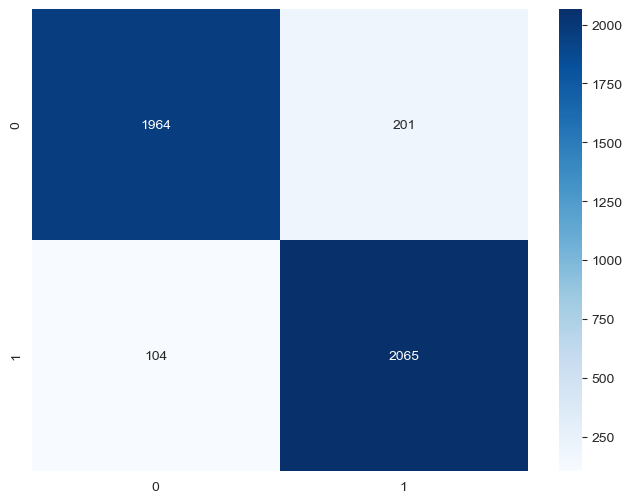

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues')
plt.show()

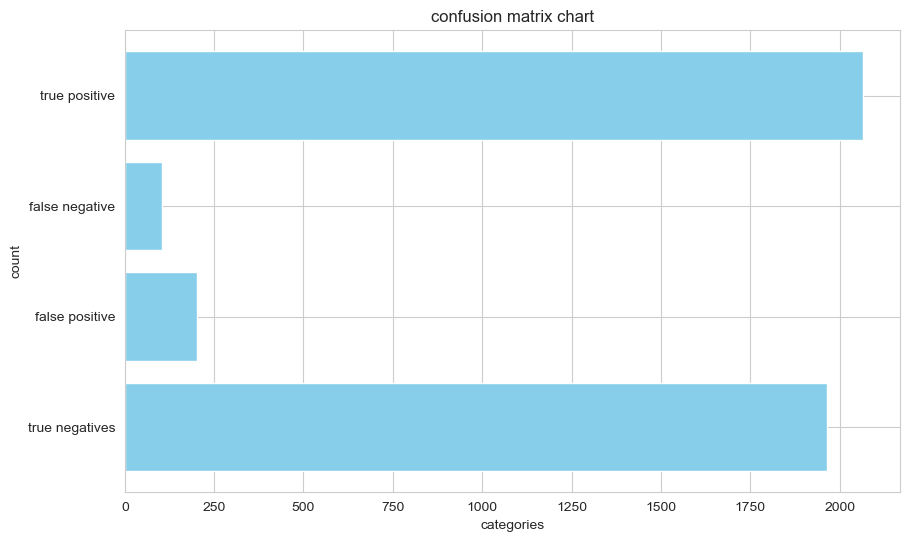

In [68]:
categories= ['true negatives', 'false positive', 'false negative', 'true positive']
values = [tn, fp, fn, tp]
plt.figure(figsize=(10,6))
cmbar = plt.barh(categories, values, color='skyblue')
plt.title('confusion matrix chart')
plt.xlabel('categories')
plt.ylabel('count')
plt.show()

In [69]:
cm_entropy= confusion_matrix(Y_test, y_pred_entropy)
tn1, fp1, fn1, tp1 = cm_entropy.ravel()
print(cm_entropy)

[[1964  201]
 [ 104 2065]]


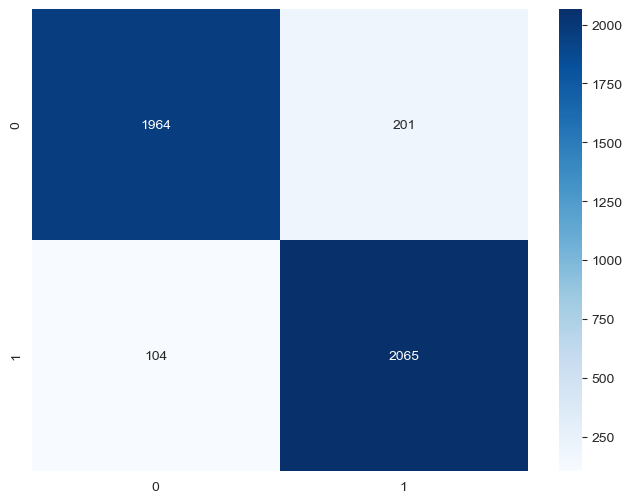

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_entropy, annot=True, fmt='d', cmap='Blues')
plt.show()

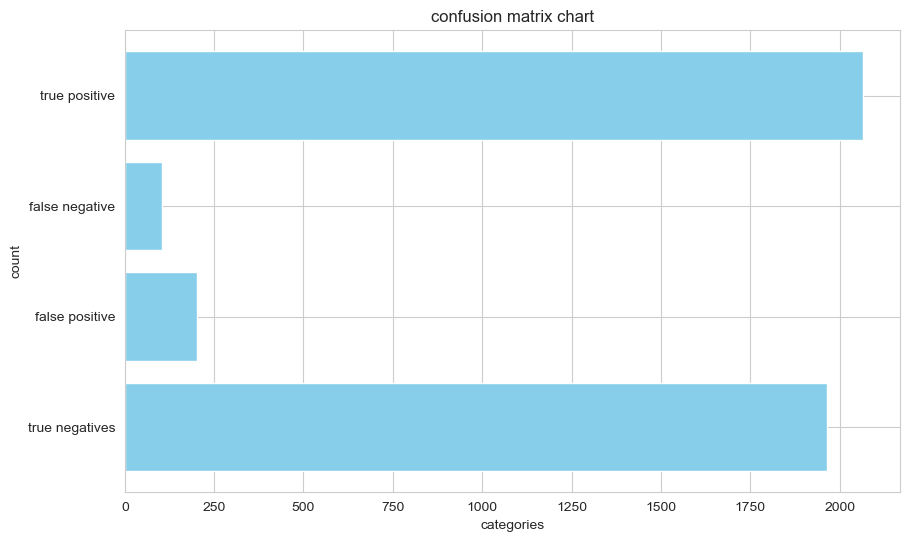

In [71]:
categories= ['true negatives', 'false positive', 'false negative', 'true positive']
values = [tn1, fp1, fn1, tp1]
plt.figure(figsize=(10,6))
cmbar = plt.barh(categories, values, color='skyblue')
plt.title('confusion matrix chart')
plt.xlabel('categories')
plt.ylabel('count')
plt.show()

for gini criterion decision tree, satisfaction is the most important feature whereas n_projects is the least 
for entropy criterion decision tree, though n_project has a higher distribution than in gini, it still remains the least important feature and satisfaction most important

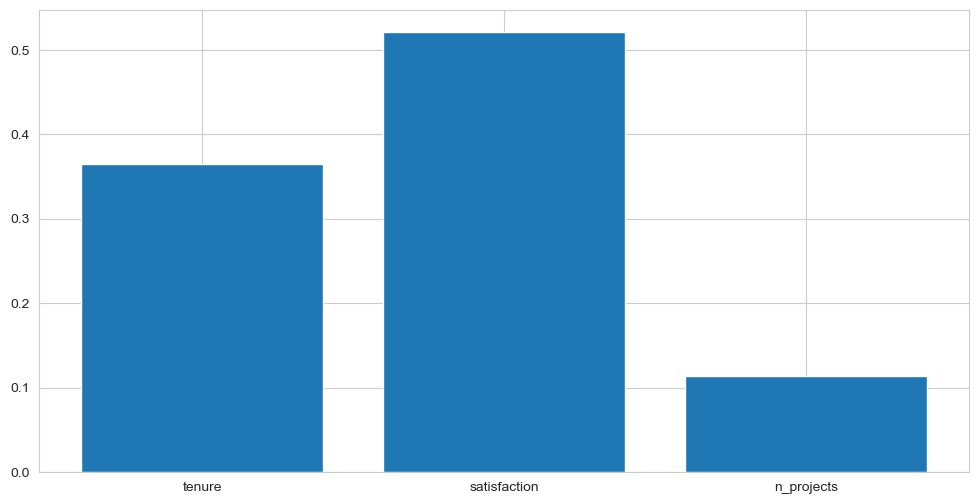

In [73]:
feature_importances = clf_gini.feature_importances_
features = df[feature_cols].columns
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importances)
plt.show()

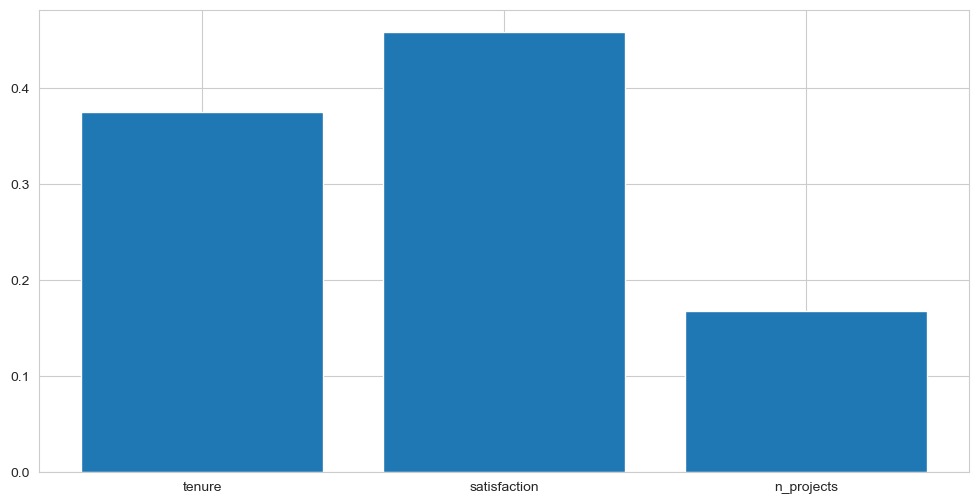

In [74]:
feature_importances = clf_entropy.feature_importances_
features = df[feature_cols].columns
plt.figure(figsize=(12, 6))
plt.bar(features, feature_importances)
plt.show()